### Importing libraries

In [ ]:
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud


### Listing and Reading files

In [ ]:
# Get a list of student files
student_file = [file for file in os.listdir() if file.endswith('.txt')]

# Read the content of each student's file
student_docs = [open(file).read() for file in student_file]

In [ ]:
# Print the list of student files and their content
for filename, document in zip(student_file, student_docs):
    print(f"File: {filename}")
    print("Content:")
    print(document)
    print("-" * 30)  # Separator between documents

File: document 3.txt
Content:
Machine Learning is the field of study that gives computers the capability to learn without being explicitly programmed.
Machine Learning tutorial covers basic and advanced concepts
The ability to learn. Machine learning is actively being used today, perhaps in many more places than one would expect.
------------------------------
File: document 2.txt
Content:
Machine Learning tutorial covers basic and advanced concepts, specially designed to cater to both students and experienced working professionals.
Machine learning (ML) is a subdomain of artificial intelligence (AI) that focuses on developing systems that learn—or improve performance—based on the data they ingest.
Machine Learning is the field of study that gives computers the capability to learn without being explicitly programmed.
------------------------------
File: document 1.txt
Content:
Machine Learning tutorial covers basic and advanced concepts, specially designed to cater to both students and

### Creating TF-IDF vectors

In [ ]:
# Function to create TF-IDF vectors from a list of documents
def create_tfidf_vectors(docs):
    return TfidfVectorizer().fit_transform(docs).toarray()

### Calculating Cosine Similarity

In [ ]:
# Function to calculate cosine similarity between two document vectors
def calc_cosine_similarity(vector1, vector2):
    return cosine_similarity([vector1, vector2])

### Creating Document-vector Pairs

In [ ]:
# Create TF-IDF vectors for the student documents
doc_vec = create_tfidf_vectors(student_docs)
# Pair each document with its corresponding filename
doc_filename_pairs = list(zip(student_file, doc_vec))


### Checking For Plagiarism

In [ ]:
# Function to check for plagiarism
def find_plagiarism():
    plagiarism_results = set()
    global doct_filename_pairs
    for student_a_file, student_a_vec in doc_filename_pairs:
        remaining_pairs = doc_filename_pairs.copy()
        current_index = remaining_pairs.index((student_a_file, student_a_vec))
        del remaining_pairs[current_index]
        for student_b_file, student_b_vec in remaining_pairs:
            similarity_score = calc_cosine_similarity(student_a_vec, student_b_vec)[0][1]
            sorted_filenames = sorted((student_a_file, student_b_file))
            plagiarism_result = (sorted_filenames[0], sorted_filenames[1], similarity_score)
            plagiarism_results.add(plagiarism_result)
    return plagiarism_results

# Print plagiarism results
plagiarism_results = find_plagiarism()
for result in plagiarism_results:
    print(result)


('document 1.txt', 'document 2.txt', 0.45525211194943355)
('document 1.txt', 'document 3.txt', 0.3776330674284335)
('document 2.txt', 'document 3.txt', 0.5867653389309443)


### WordCloud Visualization of Documents

In [ ]:
# Function to generate word cloud for a document
def generate_word_cloud(document_text, filename):
    wordcloud = WordCloud(width=800, height=400).generate(document_text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {filename}')
    plt.axis('off')
    plt.show()

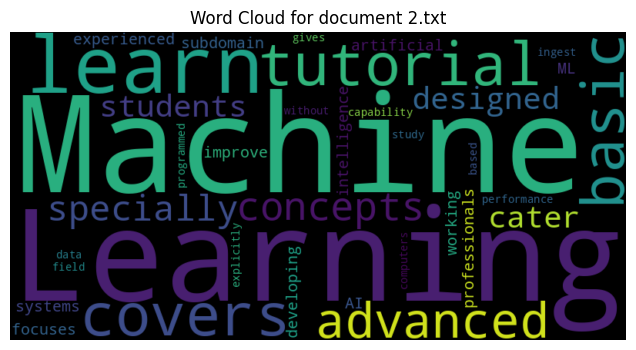

In [ ]:
plagiarism_results = find_plagiarism()
for result in plagiarism_results:
    if result[2] >= 0.5:
        generate_word_cloud(open(result[0]).read(), result[0])

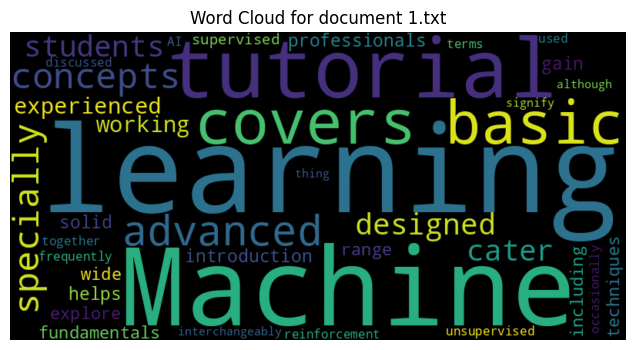

In [ ]:
target_document = "document 1.txt"
for filename, document_vector in doc_filename_pairs:
    if filename == target_document:
        generate_word_cloud(open(filename).read(), filename)


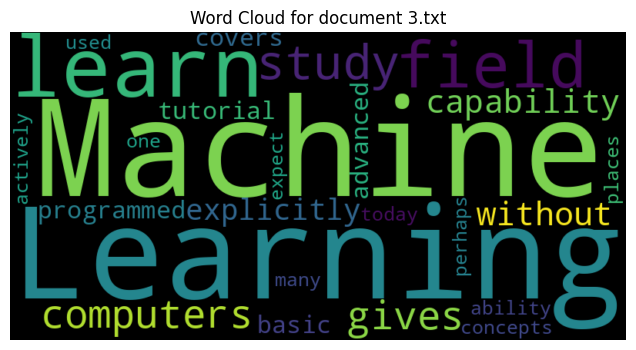

In [ ]:
# Find and generate word cloud for "juma.txt"
target_document = "document 3.txt"
for filename, document_vector in doc_filename_pairs:
    if filename == target_document:
        generate_word_cloud(open(filename).read(), filename)